In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

#definimos nuestras unidades
um = 1e-6 #micrometros
mm = 1e-3 #milimetros
nm= 1e-9 #nanometros

w_length = 650*nm #longitud de onda de luz roja monocromática y coherente
dx=dy=100*um #tamaño de pixel que se considera

In [3]:
#Se define una función que haga shift al campo entrante, la transformada de Fourier 2D con FFT y realice el shift posterior
def ft2(U, delta):
   
    DATA = np.fft.fftshift(
            np.fft.fft2(
                    np.fft.fftshift(U, axes=(-1,-2))
                    ), axes=(-1,-2)
            )

    return DATA

In [36]:
def TFresnel(Uin, wvl, d1, z):
    """
    Propagación de Fresnel usando el método de Transformada de Fresnel
    Devuelve amplitud compleja tras la propagacion

    """
    N = Uin.shape[0]    #Se asume que es cuadrado
    k = 2*np.pi/wvl  #vector de onda optico

    #Coordenadas en el plano de entrada
    x1,y1 = np.meshgrid( np.arange(-N/2.,N/2.) * d1,
                            np.arange(-N/2.,N/2.) * d1)
    #Coordenadas del plano de observación
    d2 = wvl*z/(N*d1)
    x2,y2 = np.meshgrid( np.arange(-N/2.,N/2.) * d2,
                            np.arange(-N/2.,N/2.) * d2 )

    #Evaluación de la integral
    A = (np.exp(1j*k*z))/(1j*wvl*z)
    B = np.exp( 1j * k/(2*z) * (x2**2 + y2**2))
    C = ft2(Uin *np.exp(1j * k/(2*z) * (x1**2+y1**2)), d1)

    Uout = A*B*C

    return Uout

Tomada de https://es.vexels.com/png-svg/vista-previa/218221/silueta-de-gafas-de-sol-con-montura-cuadrada


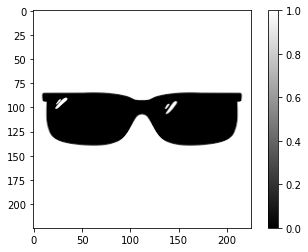

In [35]:
T = cv2.imread("gafas.png",0)
T = T/np.max(T)

plt.figure()
plt.imshow(T,cmap="gray")
plt.colorbar()
plt.show
print('Tomada de https://es.vexels.com/png-svg/vista-previa/218221/silueta-de-gafas-de-sol-con-montura-cuadrada')

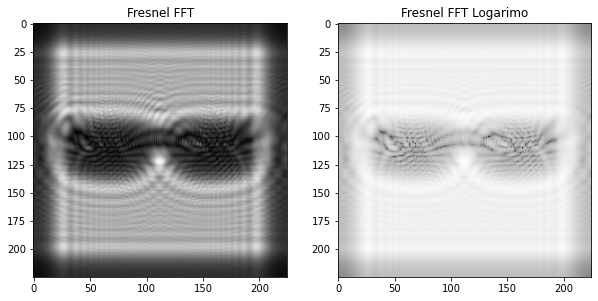

In [32]:
z=4000*mm

sc=TFresnel(T,w_length,dx,z)


fig, arreglo_plots = plt.subplots(1,2, figsize=(10, 7))
arreglo_plots[0].set_title('Fresnel FFT')
arreglo_plots[0].imshow(np.abs(sc),cmap='gray')
arreglo_plots[1].set_title('Fresnel FFT Logaritmo')
arreglo_plots[1].imshow(np.log(np.abs(sc)),cmap='gray')